In [1]:
import pandas as pd

# Load the dog_owners dataset
dog_owners = pd.read_csv("/Users/kachu/Desktop/DS/archive-5/20170308hundehalter.csv")

# Load the dog_breeds dataset
dog_breeds = pd.read_csv("/Users/kachu/Desktop/DS/archive-5/zuordnungstabellehunderassehundetyp.csv")

# Display the first few rows of the dog_owners dataset
dog_owners.head()

/Users/kachu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


In [2]:
# Display the column names in both datasets
print("Column names in dog_owners dataset:", dog_owners.columns)
print("Column names in dog_breeds dataset:", dog_breeds.columns)

Column names in dog_owners dataset: Index(['HALTER_ID', 'ALTER', 'GESCHLECHT', 'STADTKREIS', 'STADTQUARTIER',
       'RASSE1', 'RASSE1_MISCHLING', 'RASSE2', 'RASSE2_MISCHLING', 'RASSENTYP',
       'GEBURTSJAHR_HUND', 'GESCHLECHT_HUND', 'HUNDEFARBE'],
      dtype='object')
Column names in dog_breeds dataset: Index(['HUNDERASSE', 'HUNDERASSENTYP_KURZ', 'HUNDERASSENTYP'], dtype='object')


In [3]:
# Rename columns in dog_breeds dataset
dog_breeds = dog_breeds.rename(columns={
    "HUNDERASSE": "breed",
    "HUNDERASSENTYP_KURZ": "breed_type_short",
    "HUNDERASSENTYP": "breed_type_long"
})

# Rename columns in dog_owners dataset
dog_owners = dog_owners.rename(columns={
    "HALTER_ID": "owner_id",
    "ALTER": "age",
    "GESCHLECHT": "owner_gender",
    "STADTKREIS": "district",
    "RASSE1": "breed",
    "RASSE2": "secondary_breed",
    "GEBURTSJAHR_HUND": "birth_year",
    "GESCHLECHT_HUND": "dog_gender",
    "HUNDEFARBE": "color"
})

# Merge dog_owners and dog_breeds datasets on 'breed' column
owners_dogs_merged = pd.merge(dog_owners, dog_breeds, on="breed")

# Drop unnecessary columns
owners_dogs_merged = owners_dogs_merged.drop(columns=[
    "secondary_breed",
    "RASSENTYP",
    "STADTQUARTIER",
    "RASSE1_MISCHLING",
    "RASSE2_MISCHLING"
])

# Select and reorder columns
owners_dogs_merged = owners_dogs_merged[[
    "owner_id",
    "age",
    "owner_gender",
    "district",
    "breed",
    "birth_year",
    "dog_gender",
    "color",
    "breed_type_short",
    "breed_type_long"
]]

# Drop rows with missing values
owners_dogs_merged = owners_dogs_merged.dropna()

# Display the first few rows of the merged and cleaned dataset
owners_dogs_merged.head()

,owner_id,age,owner_gender,district,breed,birth_year,dog_gender,color,breed_type_short,breed_type_long
0,126,61-70,m,9.0,Welsh Terrier,2011,w,schwarz/braun,K,Kleinwüchsig
1,171,61-70,m,3.0,Berner Sennenhund,2009,m,tricolor,I,Rassentypenliste I
2,574,61-70,w,2.0,Mischling gross,2013,w,schwarz,I,Rassentypenliste I
3,695,41-50,m,6.0,Labrador Retriever,2012,w,braun,I,Rassentypenliste I
4,893,61-70,w,7.0,Mittelschnauzer,2010,w,schwarz,I,Rassentypenliste I


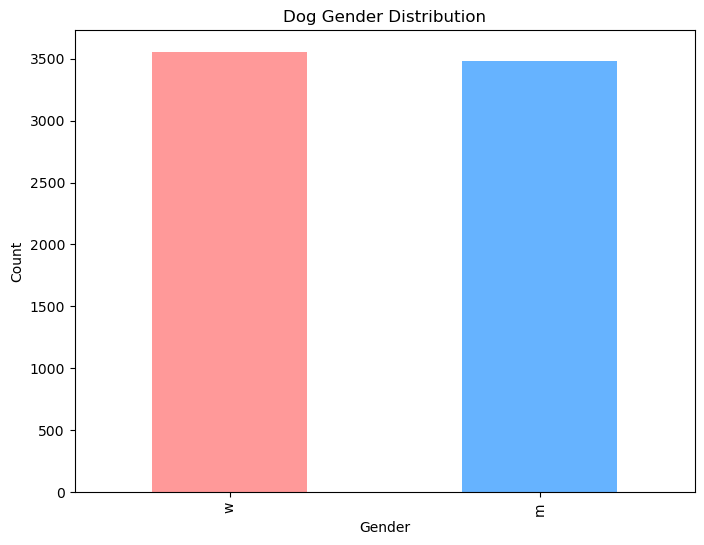

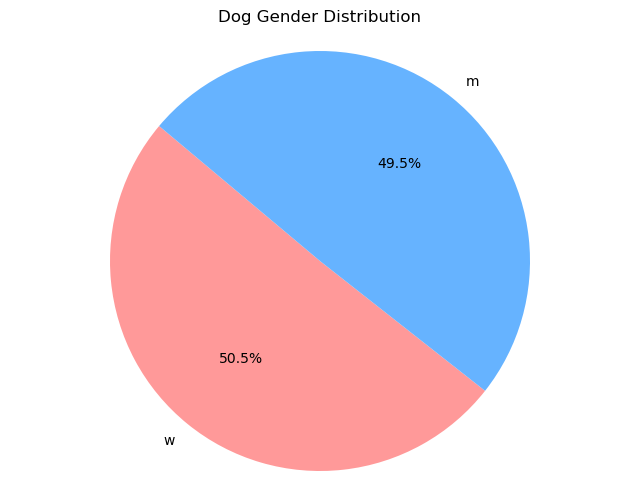

In [4]:
import matplotlib.pyplot as plt

# Count the number of each dog gender
gender_counts = owners_dogs_merged['dog_gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Aesthetic colors
gender_counts.plot(kind='bar', color=colors)
plt.title('Dog Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Create a pie chart
plt.figure(figsize=(8, 6))
labels = gender_counts.index
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Dog Gender Distribution')

plt.show()

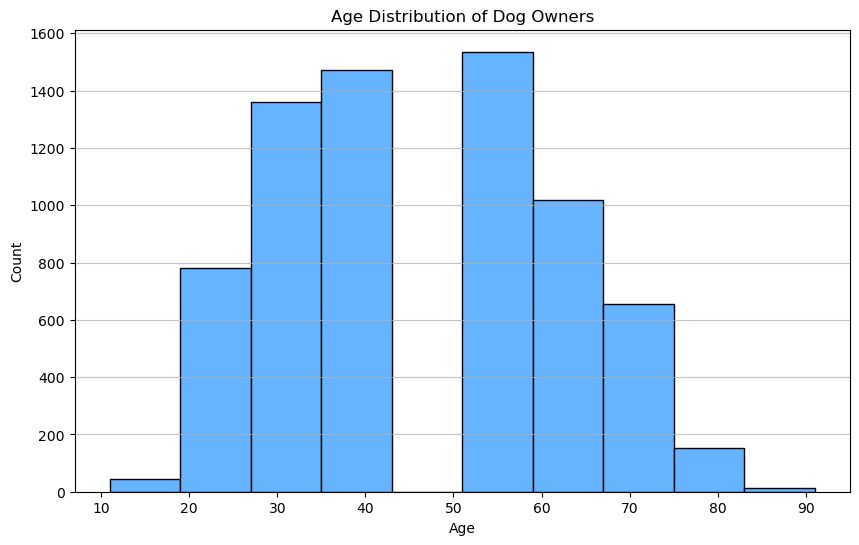

In [11]:
# Convert the 'age' column to a numeric format (e.g., using the lower end of the age range)
#owners_dogs_merged['age'] = owners_dogs_merged['age'].str.split('-').str[0].astype(int)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(owners_dogs_merged['age'], bins=10, color='#66b3ff', edgecolor='black')
plt.title('Age Distribution of Dog Owners')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

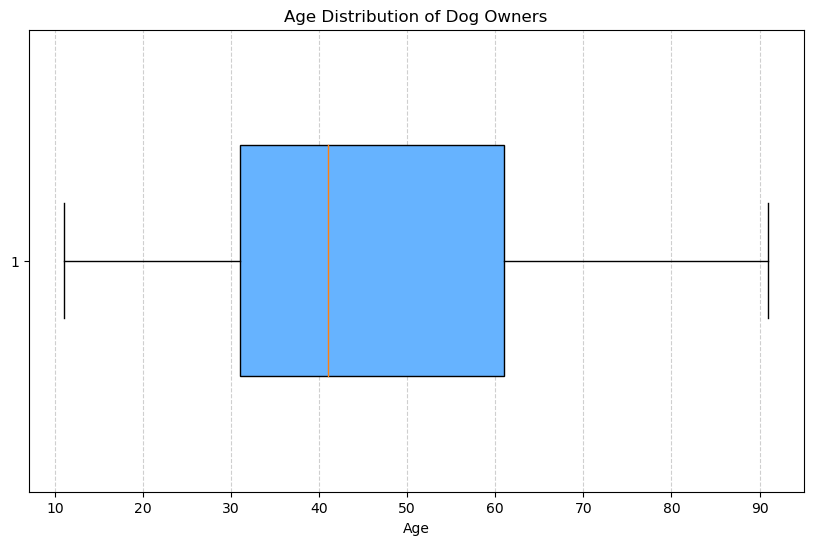

In [12]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(owners_dogs_merged['age'], vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='#66b3ff'))
plt.title('Age Distribution of Dog Owners')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [14]:
#The line in the middle of the box indicates the median age of dog owners. This is the age that divides the 
#dataset into two equal halves, with 50% of the data falling below this value and 50% above.


In [15]:
# Count the frequencies of each primary breed
breed_counts = owners_dogs_merged['breed'].value_counts()

# Display the top primary breeds and their frequencies
top_breeds = breed_counts.head(10)  # You can adjust the number as needed
print("Top Primary Breeds and Their Frequencies:")
print(top_breeds)

Top Primary Breeds and Their Frequencies:
breed
Mischling klein           620
Chihuahua                 516
Labrador Retriever        439
Yorkshire Terrier         298
Jack Russel Terrier       290
Französische Bulldogge    213
Mischling gross           206
Malteser                  205
Mops                      171
Schäfer                   168
Name: count, dtype: int64


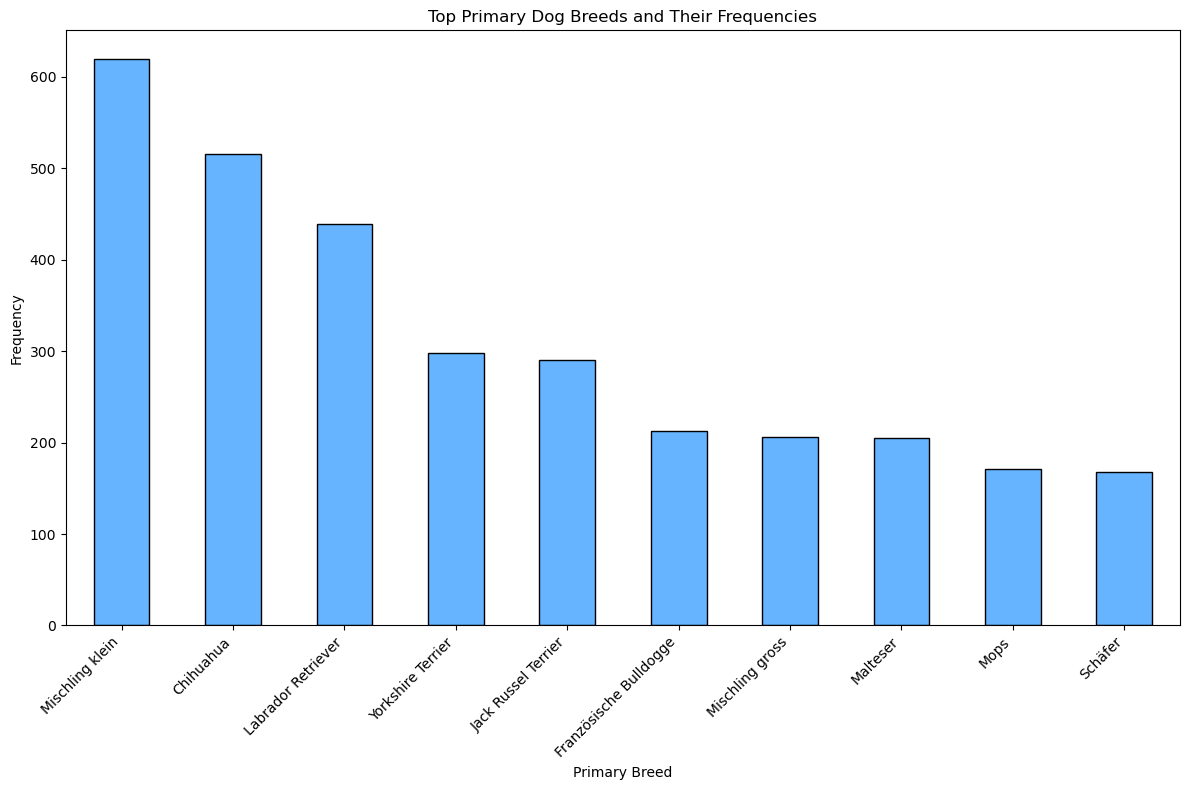

In [16]:
# Create a bar plot for the top primary breeds and their frequencies
plt.figure(figsize=(12, 8))
top_breeds.plot(kind='bar', color='#66b3ff', edgecolor='black')
plt.title('Top Primary Dog Breeds and Their Frequencies')
plt.xlabel('Primary Breed')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [17]:
#The breed with the highest frequency is "Mischling Klein," which seems to refer to small mixed-breed dogs.
#The following breeds in descending order of frequency are: Chihuahua, Labrador Retriever, Yorkshire Terrier, Jack Russell Terrier, Französische Bulldogge (French Bulldog), Mischling Gross (large mixed breed), Malteser (Maltese), and Husky.
#The Siberian Husky and Maltese are at the lower end of the frequency scale among the breeds listed.

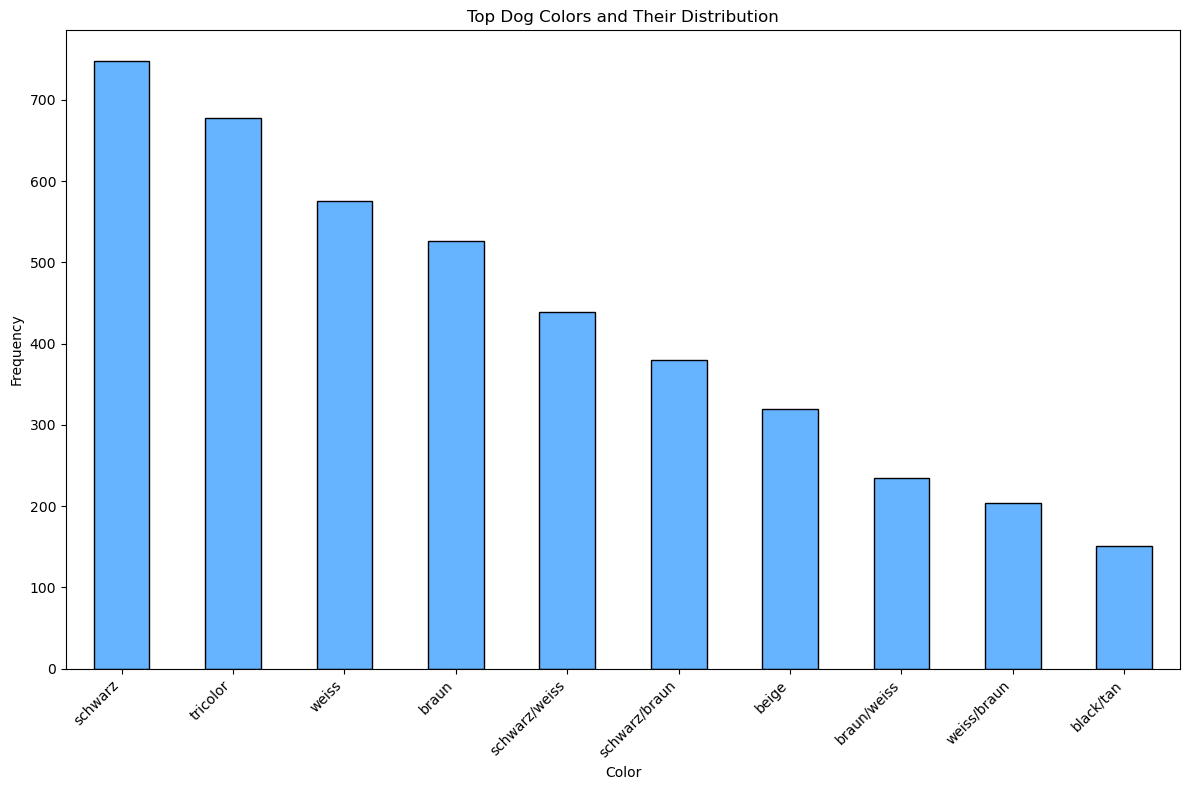

In [18]:
# Count the frequencies of each dog color
color_counts = owners_dogs_merged['color'].value_counts()

# Display the top dog colors and their frequencies
top_colors = color_counts.head(10)  # You can adjust the number as needed

# Create a bar plot for the top dog colors and their frequencies
plt.figure(figsize=(12, 8))
top_colors.plot(kind='bar', color='#66b3ff', edgecolor='black')
plt.title('Top Dog Colors and Their Distribution')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [19]:
#The most common color is "Schwarz" (Black), which has the highest bar on the chart.
#The rarest color among those listed is "Weiss/Schwarz" (White/Black), which has the lowest bar on the chart.

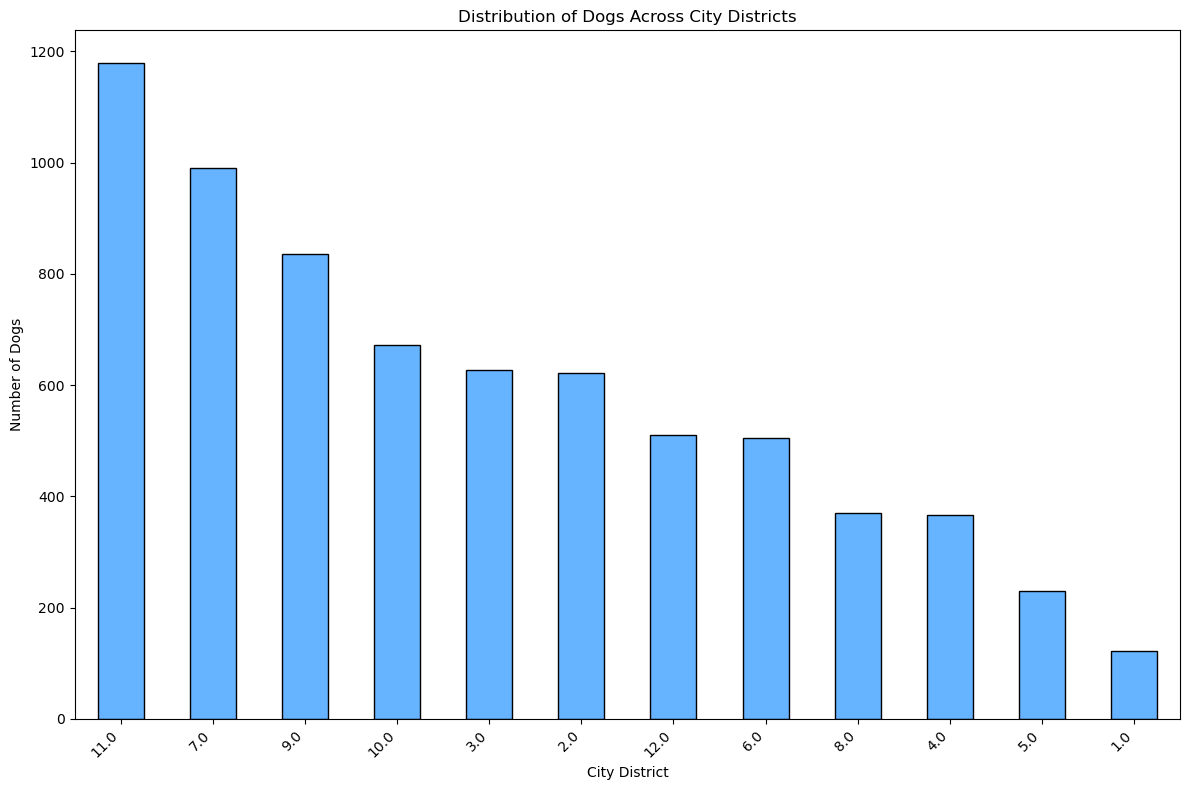

In [20]:
# Count the frequencies of dogs in each city district
district_counts = owners_dogs_merged['district'].value_counts()

# Create a bar plot for the distribution of dogs across city districts
plt.figure(figsize=(12, 8))
district_counts.plot(kind='bar', color='#66b3ff', edgecolor='black')
plt.title('Distribution of Dogs Across City Districts')
plt.xlabel('City District')
plt.ylabel('Number of Dogs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [ ]:
#District "11.0" has the highest number of dogs, significantly more than any other district
#The district with the fewest dogs is "1.0", which has the shortest bar.
